In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("APY.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

State District       Crop  Crop_Year  \
0       Andaman and Nicobar Island  NICOBARS  Arecanut       2007   
1       Andaman and Nicobar Island  NICOBARS  Arecanut       2007   
2       Andaman and Nicobar Island  NICOBARS  Arecanut       2008   
3       Andaman and Nicobar Island  NICOBARS  Arecanut       2008   
4       Andaman and Nicobar Island  NICOBARS  Arecanut       2009   
...                            ...       ...       ...        ...   
345331                 West Bengal   PURULIA     Wheat       2015   
345332                 West Bengal   PURULIA     Wheat       2016   
345333                 West Bengal   PURULIA     Wheat       2017   
345334                 West Bengal   PURULIA     Wheat       2018   
345335                 West Bengal   PURULIA     Wheat       2019   

             Season   Area   Production  Yield  
0       Kharif       2439.6      3415.0   1.40  
1       Rabi         1626.4      2277.0   1.40  
2       Autumn       4147.0      3060.0   0.74  
3       Summer       4147.0      2660.0   0.64  
4       Autumn       4153.0      3120.0   0.75  
...             ...     ...         ...    ...  
345331  Rabi          855.0      1241.0   1.45  
345332  Rabi         1366.0      2415.0   1.77  
345333  Rabi         1052.0      2145.0   2.04  
345334  Rabi          833.0      2114.0   2.54  
345335  Rabi          516.0       931.0   1.80  

[345336 rows x 8 columns]

In [5]:
df.head(10)

State District       Crop  Crop_Year       Season  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif        
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Rabi          
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn        
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer        
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn        
5  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Summer        
6  Andaman and Nicobar Island  NICOBARS  Arecanut       2000  Kharif        
7  Andaman and Nicobar Island  NICOBARS  Arecanut       2001  Kharif        
8  Andaman and Nicobar Island  NICOBARS  Arecanut       2002  Whole Year    
9  Andaman and Nicobar Island  NICOBARS  Arecanut       2003  Whole Year    

    Area   Production  Yield  
0  2439.6      3415.0   1.40  
1  1626.4      2277.0   1.40  
2  4147.0      3060.0   0.74  
3  4147.0      2660.0   0.64  
4  4153.0      3120.0   0.75  
5  4153.0      2080.0   0.50  
6  1254.0      2000.0   1.59  
7  1254.0      2061.0   1.64  
8  1258.0      2083.0   1.66  
9  1261.0      1525.0   1.21

In [6]:
df.tail(10)

State District    Crop  Crop_Year       Season   Area   \
345326  West Bengal   PURULIA  Wheat       2010  Rabi         2013.0   
345327  West Bengal   PURULIA  Wheat       2011  Rabi         1880.0   
345328  West Bengal   PURULIA  Wheat       2012  Rabi         1648.0   
345329  West Bengal   PURULIA  Wheat       2013  Rabi         1187.0   
345330  West Bengal   PURULIA  Wheat       2014  Rabi         1622.0   
345331  West Bengal   PURULIA  Wheat       2015  Rabi          855.0   
345332  West Bengal   PURULIA  Wheat       2016  Rabi         1366.0   
345333  West Bengal   PURULIA  Wheat       2017  Rabi         1052.0   
345334  West Bengal   PURULIA  Wheat       2018  Rabi          833.0   
345335  West Bengal   PURULIA  Wheat       2019  Rabi          516.0   

        Production  Yield  
345326      5152.0   2.56  
345327      4206.0   2.24  
345328      3310.0   2.01  
345329      2675.0   2.25  
345330      3663.0   2.26  
345331      1241.0   1.45  
345332      2415.0   1.77  
345333      2145.0   2.04  
345334      2114.0   2.54  
345335       931.0   1.80

In [7]:
df.shape

(345336, 8)

In [8]:
df.index

RangeIndex(start=0, stop=345336, step=1)

In [9]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [10]:
df.rename(columns={'District ': 'District', 'Area ':'Area'}, inplace=True)

In [11]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield'],
      dtype='object')

In [12]:
df['Season'].unique()

array(['Kharif     ', 'Rabi       ', 'Autumn     ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

In [13]:
season_mapping = {
    'Kharif     ': 'Kharif',
    'Rabi       ': 'Rabi',
    'Whole Year ': 'Whole Year',
    'Autumn     ': 'Autumn',
    'Summer     ': 'Summer',
    'Winter     ': 'Winter'
}

df['Season'] = df['Season'].replace(season_mapping)


In [14]:
df['Season'].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

In [15]:
df['State'].unique()

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [16]:
state_mapping = {
    'The Dadra And Nagar Haveli': 'Dadra And Nagar Haveli',
    'Laddak': 'Ladakh'
}

#df['State'].str.capitalize().unique() #Convert column values to lowercase with the first letter capitalized
df['State'] = df['State'].str.title().str.strip() #Capitalize the first letter of each word

df['State'] = df['State'].replace(state_mapping)
df['State'].unique()

array(['Andaman And Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [17]:
all_state = df['State'].unique()
print(type(all_state))
print(all_state.size)
print(all_state)

<class 'numpy.ndarray'>
36
['Andaman And Nicobar Island' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra And Nagar Haveli'
 'Daman And Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu And Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [18]:
df[df['State'] == 'Bihar']['District'].nunique()

56

In [19]:
df[df['State'] == 'Bihar']['District'].unique()

array(['ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI', 'BHAGALPUR',
       'BHOJPUR', 'BOKARO', 'BUXAR', 'CHATRA', 'DARBHANGA', 'DEOGHAR',
       'DHANBAD', 'DUMKA', 'EAST SINGHBUM', 'GARHWA', 'GAYA', 'GIRIDIH',
       'GODDA', 'GOPALGANJ', 'GUMLA', 'HAZARIBAGH', 'JAMUI', 'JEHANABAD',
       'KAIMUR (BHABUA)', 'KATIHAR', 'KHAGARIA', 'KISHANGANJ', 'KODERMA',
       'LAKHISARAI', 'LOHARDAGA', 'MADHEPURA', 'MADHUBANI', 'MUNGER',
       'MUZAFFARPUR', 'NALANDA', 'NAWADA', 'PAKUR', 'PALAMU',
       'PASHCHIM CHAMPARAN', 'PATNA', 'PURBI CHAMPARAN', 'PURNIA',
       'RANCHI', 'ROHTAS', 'SAHARSA', 'SAHEBGANJ', 'SAMASTIPUR', 'SARAN',
       'SHEIKHPURA', 'SHEOHAR', 'SITAMARHI', 'SIWAN', 'SUPAUL',
       'VAISHALI', 'WEST SINGHBHUM'], dtype=object)

In [20]:
df['District'] = df['District'].str.title().str.strip()

In [21]:
df[df['State'] == 'Bihar']['District'].unique()

array(['Araria', 'Arwal', 'Aurangabad', 'Banka', 'Begusarai', 'Bhagalpur',
       'Bhojpur', 'Bokaro', 'Buxar', 'Chatra', 'Darbhanga', 'Deoghar',
       'Dhanbad', 'Dumka', 'East Singhbum', 'Garhwa', 'Gaya', 'Giridih',
       'Godda', 'Gopalganj', 'Gumla', 'Hazaribagh', 'Jamui', 'Jehanabad',
       'Kaimur (Bhabua)', 'Katihar', 'Khagaria', 'Kishanganj', 'Koderma',
       'Lakhisarai', 'Lohardaga', 'Madhepura', 'Madhubani', 'Munger',
       'Muzaffarpur', 'Nalanda', 'Nawada', 'Pakur', 'Palamu',
       'Pashchim Champaran', 'Patna', 'Purbi Champaran', 'Purnia',
       'Ranchi', 'Rohtas', 'Saharsa', 'Sahebganj', 'Samastipur', 'Saran',
       'Sheikhpura', 'Sheohar', 'Sitamarhi', 'Siwan', 'Supaul',
       'Vaishali', 'West Singhbhum'], dtype=object)

In [22]:
df['Crop'].nunique()

55

In [23]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Cowpea(Lobia)', 'Dry chillies', 'Ginger', 'Groundnut',
       'Maize', 'Moong(Green Gram)', 'Oilseeds total',
       'Other Kharif pulses', 'other oilseeds', 'Rapeseed &Mustard',
       'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Sweet potato',
       'Tapioca', 'Turmeric', 'Urad', 'Bajra', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Garlic', 'Gram', 'Guar seed', 'Horse-gram',
       'Jowar', 'Linseed', 'Masoor', 'Mesta', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Potato', 'Ragi', 'Safflower', 'Sannhamp',
       'Small millets', 'Soyabean', 'Tobacco', 'Wheat',
       'Peas & beans (Pulses)', 'Jute', 'Barley', 'Khesari', 'Moth',
       'Other Cereals', 'Cardamom', 'Other Summer Pulses', nan],
      dtype=object)

In [24]:
df.dtypes

State          object
District       object
Crop           object
Crop_Year       int64
Season         object
Area          float64
Production    float64
Yield         float64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [26]:
df.isnull()

State  District   Crop  Crop_Year  Season   Area  Production  Yield
0       False     False  False      False   False  False       False  False
1       False     False  False      False   False  False       False  False
2       False     False  False      False   False  False       False  False
3       False     False  False      False   False  False       False  False
4       False     False  False      False   False  False       False  False
...       ...       ...    ...        ...     ...    ...         ...    ...
345331  False     False  False      False   False  False       False  False
345332  False     False  False      False   False  False       False  False
345333  False     False  False      False   False  False       False  False
345334  False     False  False      False   False  False       False  False
345335  False     False  False      False   False  False       False  False

[345336 rows x 8 columns]

In [27]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [28]:
df[df['Crop'].isna()] #Print Rows Where 'Crop' is Null (NaN)

State        District Crop  Crop_Year  Season   Area  Production  \
273741  Tamil Nadu      Coimbatore  NaN       1998    Rabi   20.0         1.0   
273742  Tamil Nadu        Dindigul  NaN       2002    Rabi    1.0         0.0   
273743  Tamil Nadu     Krishnagiri  NaN       2004    Rabi    1.0         NaN   
273744  Tamil Nadu        Namakkal  NaN       1998    Rabi  250.0        13.0   
273745  Tamil Nadu  Ramanathapuram  NaN       2006    Rabi    3.0         NaN   
273746  Tamil Nadu           Salem  NaN       1999    Rabi   25.0        12.0   
273747  Tamil Nadu    The Nilgiris  NaN       1998    Rabi  430.0        20.0   
273748  Tamil Nadu        Tiruppur  NaN       2011  Kharif    2.0         NaN   
273749  Tamil Nadu         Vellore  NaN       2006    Rabi    4.0         NaN   

        Yield  
273741   0.05  
273742   0.00  
273743   0.00  
273744   0.05  
273745   0.00  
273746   0.48  
273747   0.05  
273748   0.00  
273749   0.00

In [29]:
df.dropna(subset=['Crop'], inplace=True)

In [30]:
df[df['Production'].isna()]

State         District                   Crop  \
11      Andaman And Nicobar Island         Nicobars               Arecanut   
270     Andaman And Nicobar Island   South Andamans          Cowpea(Lobia)   
278     Andaman And Nicobar Island         Nicobars           Dry chillies   
770                 Andhra Pradesh     Vizianagaram               Arecanut   
833                 Andhra Pradesh        Anantapur              Arhar/Tur   
...                            ...              ...                    ...   
338997                 West Bengal  Purba Bardhaman      Moong(Green Gram)   
339699                 West Bengal   Medinipur West  Peas & beans (Pulses)   
340760                 West Bengal          Purulia      Rapeseed &Mustard   
340761                 West Bengal          Purulia      Rapeseed &Mustard   
344344                 West Bengal          Bankura                   Urad   

        Crop_Year      Season    Area  Production  Yield  
11           2005  Whole Year  795.67         NaN    0.0  
270          2016        Rabi    2.00         NaN    0.0  
278          2005  Whole Year   17.00         NaN    0.0  
770          2011  Whole Year    1.00         NaN    0.0  
833          2016        Rabi    1.00         NaN    0.0  
...           ...         ...     ...         ...    ...  
338997       2005      Summer    1.00         NaN    0.0  
339699       2010        Rabi    2.00         NaN    0.0  
340760       2001        Rabi  427.00         NaN    0.0  
340761       2002        Rabi  522.00         NaN    0.0  
344344       2009      Kharif    2.00         NaN    0.0  

[4944 rows x 8 columns]

In [31]:
df[(df['Yield'] == 0.0) & (df['Production'].isna())]

State         District                   Crop  \
11      Andaman And Nicobar Island         Nicobars               Arecanut   
270     Andaman And Nicobar Island   South Andamans          Cowpea(Lobia)   
278     Andaman And Nicobar Island         Nicobars           Dry chillies   
770                 Andhra Pradesh     Vizianagaram               Arecanut   
833                 Andhra Pradesh        Anantapur              Arhar/Tur   
...                            ...              ...                    ...   
338997                 West Bengal  Purba Bardhaman      Moong(Green Gram)   
339699                 West Bengal   Medinipur West  Peas & beans (Pulses)   
340760                 West Bengal          Purulia      Rapeseed &Mustard   
340761                 West Bengal          Purulia      Rapeseed &Mustard   
344344                 West Bengal          Bankura                   Urad   

        Crop_Year      Season    Area  Production  Yield  
11           2005  Whole Year  795.67         NaN    0.0  
270          2016        Rabi    2.00         NaN    0.0  
278          2005  Whole Year   17.00         NaN    0.0  
770          2011  Whole Year    1.00         NaN    0.0  
833          2016        Rabi    1.00         NaN    0.0  
...           ...         ...     ...         ...    ...  
338997       2005      Summer    1.00         NaN    0.0  
339699       2010        Rabi    2.00         NaN    0.0  
340760       2001        Rabi  427.00         NaN    0.0  
340761       2002        Rabi  522.00         NaN    0.0  
344344       2009      Kharif    2.00         NaN    0.0  

[4944 rows x 8 columns]

In [32]:
df['Production'].fillna(0.0, inplace=True)

<ipython-input-32-4ac4d925b37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(0.0, inplace=True)


In [33]:
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [34]:

df.describe()

Crop_Year          Area    Production          Yield
count  345327.000000  3.453270e+05  3.453270e+05  345327.000000
mean     2008.887680  1.167177e+04  9.447642e+05      79.425204
std         6.564326  4.584135e+04  2.137645e+07     916.690252
min      1997.000000  4.000000e-03  0.000000e+00       0.000000
25%      2003.000000  7.400000e+01  7.700000e+01       0.550000
50%      2009.000000  5.320000e+02  6.810000e+02       1.000000
75%      2015.000000  4.112000e+03  6.941000e+03       2.470000
max      2020.000000  8.580100e+06  1.597800e+09   43958.330000

In [35]:
df['Season'].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

In [36]:
all_year = df['Crop_Year'].unique()
all_year = sorted(all_year)
print(type(all_year))
print(len(all_year))
print(all_year)

<class 'list'>
24
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


# *Unique Crop Seasons in every State and every year*



In [ ]:
def unique_seasons_by_state(df, state_name):
    filtered_df = df[df['State'] == state_name]

    if filtered_df.empty:
        print(f"No data found for state: {state_name}")
        return None

    result = filtered_df.groupby('Crop_Year')['Season'].unique().apply(sorted)
    result_df = result.reset_index()
    result_df.columns = ["Crop_Year", "Seasons"]

    return result_df

state_name = input("Enter the state name: ")
result = unique_seasons_by_state(df, state_name)

if result is not None:
    pd.set_option('display.max_colwidth', None)  #Ensures full lists are displayed
    print(result.to_string(index=False))  #Prevents truncation


Enter the state name: Uttar Pradesh
 Crop_Year                            Seasons
      1997 [Kharif, Rabi, Summer, Whole Year]
      1998 [Kharif, Rabi, Summer, Whole Year]
      1999 [Kharif, Rabi, Summer, Whole Year]
      2000 [Kharif, Rabi, Summer, Whole Year]
      2001 [Kharif, Rabi, Summer, Whole Year]
      2002 [Kharif, Rabi, Summer, Whole Year]
      2003 [Kharif, Rabi, Summer, Whole Year]
      2004 [Kharif, Rabi, Summer, Whole Year]
      2005 [Kharif, Rabi, Summer, Whole Year]
      2006 [Kharif, Rabi, Summer, Whole Year]
      2007             [Kharif, Rabi, Summer]
      2008             [Kharif, Rabi, Summer]
      2009             [Kharif, Rabi, Summer]
      2010             [Kharif, Rabi, Summer]
      2011             [Kharif, Rabi, Summer]
      2012             [Kharif, Rabi, Summer]
      2013             [Kharif, Rabi, Summer]
      2014             [Kharif, Rabi, Summer]
      2015             [Kharif, Rabi, Summer]
      2016             [Kharif, Rabi, Summer

# *Unique Crop in every district of every State & every year & every season*


In [ ]:
def crop_every_district_state_year_season(df, state_name, district_name, season_name, years):
    if years == "all":
        filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name)]
    else:
        filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name) & (df['Crop_Year'].isin(years))]

    if filtered_df.empty:
        print(f"No data found for state: {state_name}, district: {district_name}, season: {season_name}, years: {years}")
        return None

    result = (
            filtered_df.groupby(['Crop_Year', 'Season'])['Crop']
            .unique()
            .apply(sorted)
            .reset_index()
        )

    return result

state_name = input("Enter the state name: ")
district_name = input("Enter the district name: ")
season_name = input("Enter the season name: ")

year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

result = crop_every_district_state_year_season(df, state_name, district_name, season_name, years)

if result is not None:
    print(result.to_string(index=False))
#print(result)


Enter the state name: Bihar
Enter the district name: Patna
Enter the season name: Kharif
Enter the years (comma-separated) or type 'all': 2019
 Crop_Year Season                                                        Crop
      2019 Kharif [Arhar/Tur, Jowar, Mesta, Moong(Green Gram), Ragi, Sesamum]


In [ ]:
df['Season'].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

In [ ]:
df[df['State'] == 'Bihar']['District'].unique()

array(['Araria', 'Arwal', 'Aurangabad', 'Banka', 'Begusarai', 'Bhagalpur',
       'Bhojpur', 'Bokaro', 'Buxar', 'Chatra', 'Darbhanga', 'Deoghar',
       'Dhanbad', 'Dumka', 'East Singhbum', 'Garhwa', 'Gaya', 'Giridih',
       'Godda', 'Gopalganj', 'Gumla', 'Hazaribagh', 'Jamui', 'Jehanabad',
       'Kaimur (Bhabua)', 'Katihar', 'Khagaria', 'Kishanganj', 'Koderma',
       'Lakhisarai', 'Lohardaga', 'Madhepura', 'Madhubani', 'Munger',
       'Muzaffarpur', 'Nalanda', 'Nawada', 'Pakur', 'Palamu',
       'Pashchim Champaran', 'Patna', 'Purbi Champaran', 'Purnia',
       'Ranchi', 'Rohtas', 'Saharsa', 'Sahebganj', 'Samastipur', 'Saran',
       'Sheikhpura', 'Sheohar', 'Sitamarhi', 'Siwan', 'Supaul',
       'Vaishali', 'West Singhbhum'], dtype=object)

# *Area of particular crop in every Seasons in every State and every year*

In [ ]:
def Area_Of_particular_crop_every_district_state_year_season(df, state_name, district_name, season_name, years, crops):
    if years == "all":
        if crops == "all":
          filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name)]
        else:
          filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name) & (df['Crop'].isin(crops))]
    else:
        if crops == "all":
          filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name) & (df['Crop_Year'].isin(years))]
        else:
            filtered_df = df[(df['State'] == state_name) & (df['District'] == district_name) & (df['Season'] == season_name) & (df['Crop_Year'].isin(years)) & (df['Crop'].isin(crops))]

    if filtered_df.empty:
        print(f"No data found for state: {state_name}, district: {district_name}, season: {season_name}, years: {years}, crops:{crops}")
        return None

    return filtered_df.sort_values(by=['Crop_Year', 'Crop'])

state_name = input("Enter the state name: ")
district_name = input("Enter the district name: ")
season_name = input("Enter the season name: ")

year = input("Enter the years (comma-separated) or type 'all': ")
crop = input("Enter the crop name (comma-separated) or type 'all': ")

if crop.lower() == "all":
    crops = "all"
else:
    crops = crop.split(",")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

result = Area_Of_particular_crop_every_district_state_year_season(df, state_name, district_name, season_name, years, crops)

if result is not None:
    print(result.to_string(index=False))



Enter the state name: Andhra Pradesh
Enter the district name: Tirupati
Enter the season name: Rabi
Enter the years (comma-separated) or type 'all': all
Enter the crop name (comma-separated) or type 'all': all
No data found for state: Andhra Pradesh, district: Tirupati, season: Rabi, years: all, crops:all


# *1. Find the state which has more production during Rabi season for all year*


Enter the season name: Rabi
Enter the year: 2009
<class 'pandas.core.frame.DataFrame'>
                     State  Production
0              West Bengal  43926259.0
1              Uttarakhand  15370037.0
2            Uttar Pradesh  15260900.0
3                  Tripura  11645118.0
4                   Sikkim  10703300.0
5                Rajasthan   9277173.0
6                   Punjab   5782140.0
7               Puducherry   5417665.0
8                 Nagaland   4057100.0
9                  Mizoram   2351277.0
10               Meghalaya    987998.0
11                 Manipur    592934.0
12             Maharashtra    391421.0
13          Madhya Pradesh    357361.0
14                  Ladakh    258027.0
15               Karnataka    254329.0
16               Jharkhand    134077.0
17       Jammu And Kashmir    113420.0
18        Himachal Pradesh     92547.0
19                 Haryana     56424.0
20                 Gujarat     26313.0
21                     Goa     15260.0
22              

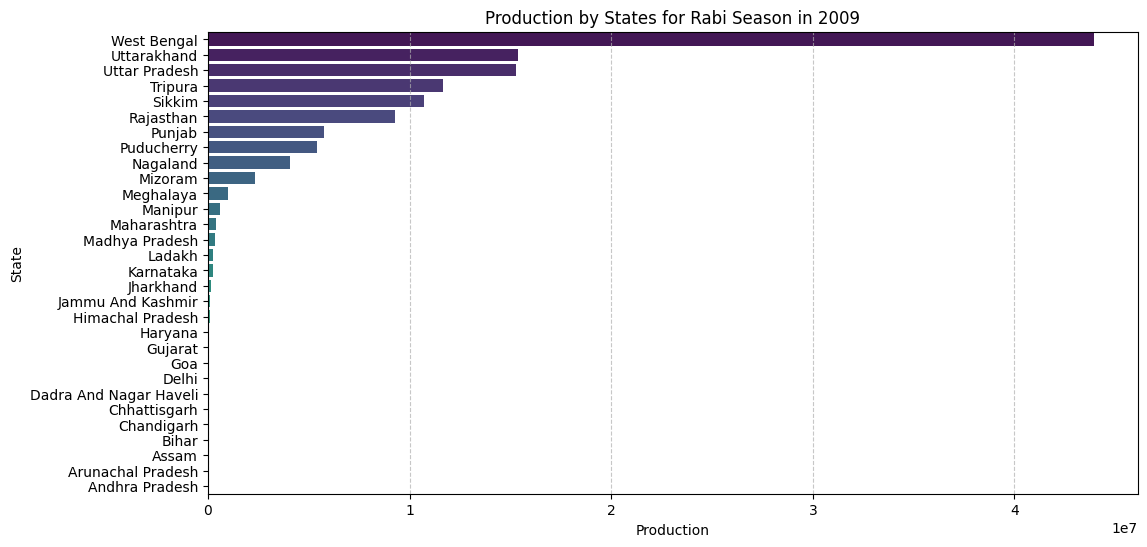

In [ ]:
def find_Production(df, season, year):
  filtered_df = df[(df['Season'] == season) & (df['Crop_Year'] == year)]
  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('State')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True), axis=0)

  result.columns = ["State", "Production"]
  return result


season = input("Enter the season name: ")
year = int(input("Enter the year: "))

production_df = find_Production(df, season, year)
print(type(production_df))
print(production_df)


plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='State', data=production_df, hue='State', palette='viridis')#legend=True, orient='h'

plt.xlabel('Production')
plt.ylabel('State')
plt.title(f'Production by States for {season} Season in {year}')
#plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#def find_Production_year_season(df, season, year):
#  filtered_df = df[(df['Season'] == season) & (df['Crop_Year'] == year)]
#
#  if filtered_df.empty:
#    return filtered_df
#
#  result = filtered_df.groupby('State')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True), axis=0)
#
#  result.columns = ["State", "Production"]
#  return result
#
#season = input("Enter the season name: ")
#
#for year in all_year:
#  production_df = find_Production_year_season(df, season, year)
#  if production_df.empty:
#    continue
#
#  plt.figure(figsize=(10, 5))
#  sns.barplot(x='Production', y='State', data=production_df, hue='State', palette='viridis')
#
#  plt.xlabel('Production')
#  plt.ylabel('State')
#  plt.title(f'Production for {season} Season in {year}')
#  #plt.xticks(rotation=45)  # Rotate labels if needed
#  plt.grid(axis='x', linestyle='--', alpha=0.7)
#  plt.show()

Enter the season name: Kharif


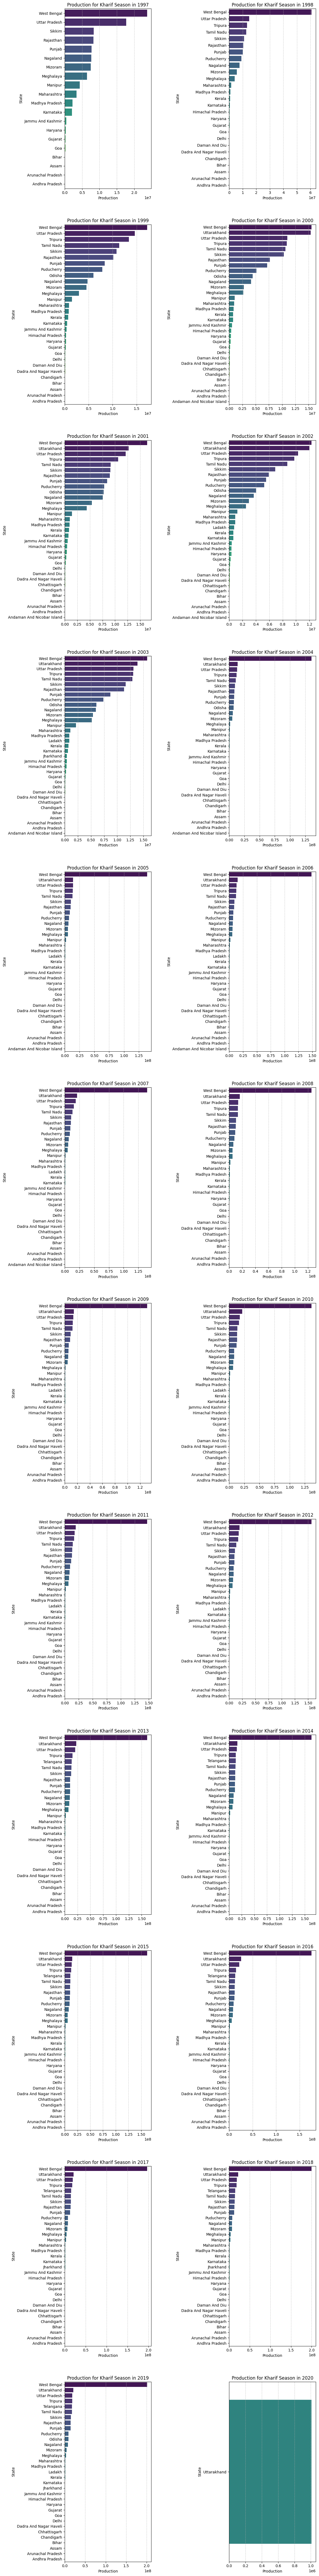

In [ ]:
def find_Production_year_season(df, season, year):
  filtered_df = df[(df['Season'] == season) & (df['Crop_Year'] == year)]
  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('State')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True), axis=0)

  result.columns = ["State", "Production"]
  return result

#-------------------------------------------------------------------------------------------------------------------------

season = input("Enter the season name: ")

row = (len(all_year) + 1) // 2
col = 2
fig, axes = plt.subplots(row, col, figsize=(12, 8*row)) #figsize=(width, height)in inches
axes = axes.flatten()  # Convert to 1D array

for i, year in enumerate(all_year):
  production_df = find_Production_year_season(df, season, year)
  if production_df.empty:
    axes[i].axis('off')
    continue

  sns.barplot(x='Production', y='State', data=production_df, hue='State', palette='viridis', ax=axes[i], legend=False)

  axes[i].set_xlabel('Production')
  axes[i].set_ylabel('State')
  axes[i].set_title(f'Production for {season} Season in {year}')
  axes[i].grid(axis='x', linestyle='--', alpha=0.7)

#------------------------------------------------------------------------------------------------------

plt.tight_layout()
# Adjust spacing to prevent overlap
plt.subplots_adjust(left=None, right=None, bottom=None, top=None, hspace=0.2, wspace=0.9)  # Increase space between subplots

plt.show()


Enter the season name: Rabi
<class 'pandas.core.frame.DataFrame'>
                         State   Production
0                  West Bengal  913857076.0
1                  Uttarakhand  367702265.0
2                Uttar Pradesh  367108999.0
3                      Tripura  312611408.0
4                    Telangana  263711696.0
5                   Tamil Nadu  209896073.0
6                       Sikkim  172415643.0
7                    Rajasthan  149271135.0
8                       Punjab  110481599.0
9                   Puducherry   92261746.0
10                      Odisha   56684303.0
11                    Nagaland   34515523.0
12                     Mizoram   19652033.0
13                   Meghalaya   18753094.0
14                     Manipur   12790711.0
15                 Maharashtra   12518107.0
16              Madhya Pradesh    9816661.0
17                      Ladakh    7629073.0
18                      Kerala    7258831.0
19                   Karnataka    2327021.0
20        

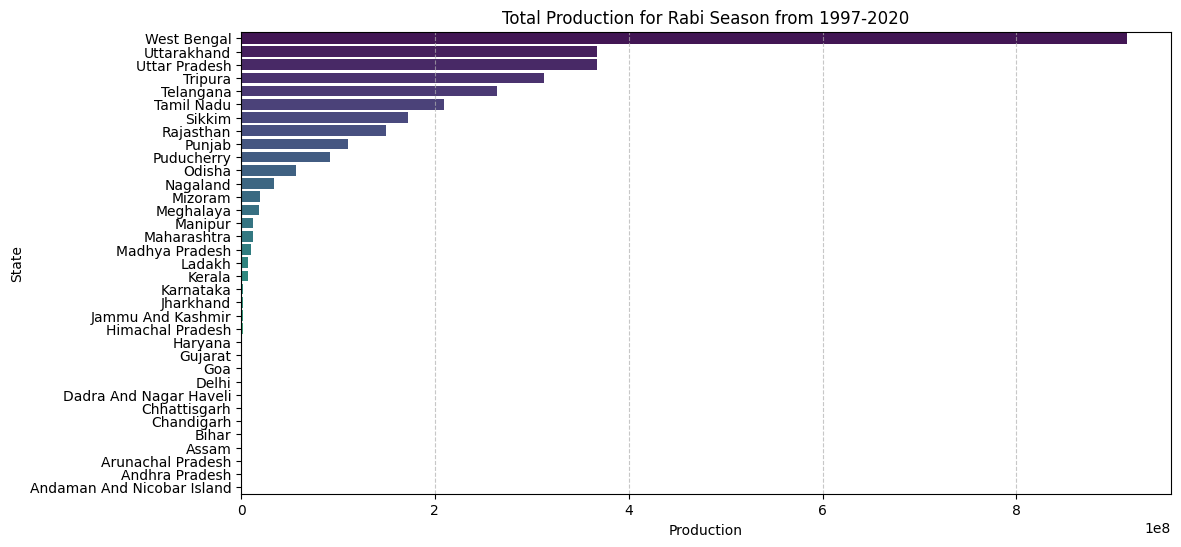

In [ ]:
def find_Total_Production_from_1997_to_2020(df, season):
  filtered_df = df[df['Season'] == season]
  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('State')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True), axis=0)

  result.columns = ["State", "Production"]
  return result


season = input("Enter the season name: ")

production_df = find_Total_Production_from_1997_to_2020(df, season)
print(type(production_df))
print(production_df)


plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='State', data=production_df, hue='State', palette='viridis')#legend=True, orient='h'

plt.xlabel('Production')
plt.ylabel('State')
plt.title(f'Total Production for {season} Season from 1997-2020')
#plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
def production_year_wise(season):
  production_year_wise = None  # Start with None

  for year in all_year:
      production_year = find_Production_year_season(df, season, year)

      production_year_df = production_year.rename(columns={"Production": year})

      # Initialize DataFrame for the first year
      if production_year_wise is None:
          production_year_wise = production_year_df
      else:
          production_year_wise = pd.merge(production_year_wise, production_year_df, on="State", how="outer")

  return production_year_wise


In [ ]:
season = input("Enter the season name: ")

production_df = production_year_wise(season)
print(type(production_df))
production_df

Enter the season name: Kharif
<class 'pandas.core.frame.DataFrame'>


State        1997        1998        1999  \
0   Andaman And Nicobar Island         NaN         NaN         NaN   
1               Andhra Pradesh       390.0      1711.0      1140.0   
2            Arunachal Pradesh     23392.0      2546.0      2532.0   
3                        Assam     41505.0     17164.0     15555.0   
4                        Bihar     88482.0     26072.0     22850.0   
5                   Chandigarh         NaN     86304.0     64798.0   
6                 Chhattisgarh         NaN         NaN         NaN   
7       Dadra And Nagar Haveli         NaN     94344.0     82988.0   
8                Daman And Diu         NaN    107461.0     98442.0   
9                        Delhi         NaN    127709.0    104965.0   
10                         Goa    201675.0    181084.0    105656.0   
11                     Gujarat    219330.0    264293.0    200258.0   
12                     Haryana    286514.0    279151.0    285318.0   
13            Himachal Pradesh         NaN    292000.0    293340.0   
14           Jammu And Kashmir    446388.0         NaN    379050.0   
15                   Jharkhand         NaN         NaN         NaN   
16                   Karnataka   2073644.0    524020.0    507703.0   
17                      Kerala         NaN    751747.0    721575.0   
18                      Ladakh         NaN         NaN         NaN   
19              Madhya Pradesh   2246162.0    925221.0    834112.0   
20                 Maharashtra   3416400.0   1562700.0    871892.0   
21                     Manipur   4298200.0         NaN   1504630.0   
22                   Meghalaya   6443090.0   4010400.0   2951148.0   
23                     Mizoram   7457650.0   5657618.0   4531802.0   
24                    Nagaland   7681866.0   7644918.0   4736206.0   
25                      Odisha         NaN         NaN   5970100.0   
26                  Puducherry         NaN   8933200.0   7829572.0   
27                      Punjab   7740439.0  10008052.0   8370682.0   
28                   Rajasthan   8279600.0  10363000.0  10129910.0   
29                      Sikkim   8319900.0  10953000.0  10831446.0   
30                  Tamil Nadu         NaN  12662299.0  11353956.0   
31                   Telangana         NaN         NaN         NaN   
32                     Tripura         NaN  13090300.0  13379653.0   
33               Uttar Pradesh  17728175.0  14795431.0  14601006.0   
34                 Uttarakhand         NaN         NaN         NaN   
35                 West Bengal  23726800.0  60780400.0  17201065.0   

          2000        2001        2002        2003         2004         2005  \
0        860.0       720.0         1.0       700.0        520.0          1.0   
1       2970.0      1719.0      1155.0      2988.0       2505.0        290.0   
2      11557.0     11218.0      2469.0      3250.0       4575.0       2807.0   
3      24397.0     26142.0      9928.0     10285.0       6800.0       2846.0   
4      39833.0     34833.0     20433.0     30851.0      29193.0       7707.0   
5      93809.0     72507.0     32112.0     32221.0      38384.0      25883.0   
6      97948.0     79806.0     59797.0     33256.0      54196.0      31530.0   
7     110380.0     81347.0     87340.0     69555.0      79876.0      32790.0   
8     112499.0     92074.0     89587.0     78341.0      90690.0      87465.0   
9     127308.0    123931.0     90889.0     87830.0     131809.0     106630.0   
10    202319.0    204983.0    130207.0    117047.0     138935.0     145306.0   
11    304442.0    312693.0    227252.0    141134.0     150959.0     155641.0   
12    333140.0    404150.0    332575.0    230425.0     211309.0     226465.0   
13    398360.0    458230.0    349180.0    344471.0     438380.0     402860.0   
14    550440.0    591370.0    392117.0    395090.0     454860.0     433870.0   
15         NaN         NaN         NaN    397950.0          NaN          NaN   
16    721654.0    736707.0    611324.0    619275.0     457979.0     625130

In [ ]:
#season = input("Enter the season name: ")
#
#row = (len(all_year) + 1) // 2  # Determine number of rows
#col = 2  # Number of columns
#fig, axes = plt.subplots(row, col, figsize=(12, 8 * row))  # Set figure size
#axes = axes.flatten()  # Convert to 1D array for easier indexing
#
#count = 0  # Initialize count variable
#
#for i, st in enumerate(all_state):
#    # Ensure the state exists in the filtered DataFrame
#    production_df = production_year_wise(season)
#    state_df = production_df[production_df["State"] == st]
#    if state_df.empty:
#        axes[i].axis("off")  # Hide empty plots
#        continue
#
#    # Plot the data
#    sns.lineplot(x=all_year, y="Production", data=state_df, ax=axes[i])
#
#    # Labels and formatting
#    axes[i].set_xlabel("Year")
#    axes[i].set_ylabel("Production")
#    axes[i].set_title(f"Production Rate for {st}")
#    axes[i].grid(axis="x", linestyle="--", alpha=0.7)
#
#    count += 1  # Increment count
#
#plt.tight_layout()  # Adjust subplot layout
#plt.subplots_adjust(hspace=0.2, wspace=0.9)  # Increase spacing
#
#plt.show()
#print(count)  # Print total plots generated


# *2. Find the district which has more production during Rabi season for all year*

Enter the season name: Kharif
Enter the state name: Bihar
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
              District  Production
0       West Singhbhum   7252564.0
1             Vaishali   6533388.0
2               Supaul   6238135.0
3                Siwan   4636060.0
4            Sitamarhi   4636013.0
5              Sheohar   2163632.0
6           Sheikhpura    534322.0
7                Saran    510587.0
8           Samastipur    510181.0
9            Sahebganj    457913.0
10             Saharsa    456934.0
11              Rohtas    417948.0
12              Ranchi    397059.0
13              Purnia    335384.0
14     Purbi Champaran    334144.0
15               Patna    324885.0
16  Pashchim Champaran    311885.0
17              Palamu    255914.0
18               Pakur    236597.0
19              Nawada    235394.0
20             Nalanda    189568.0
21         Muzaffarpur    166461.0
22              Munger    135973.0
23         

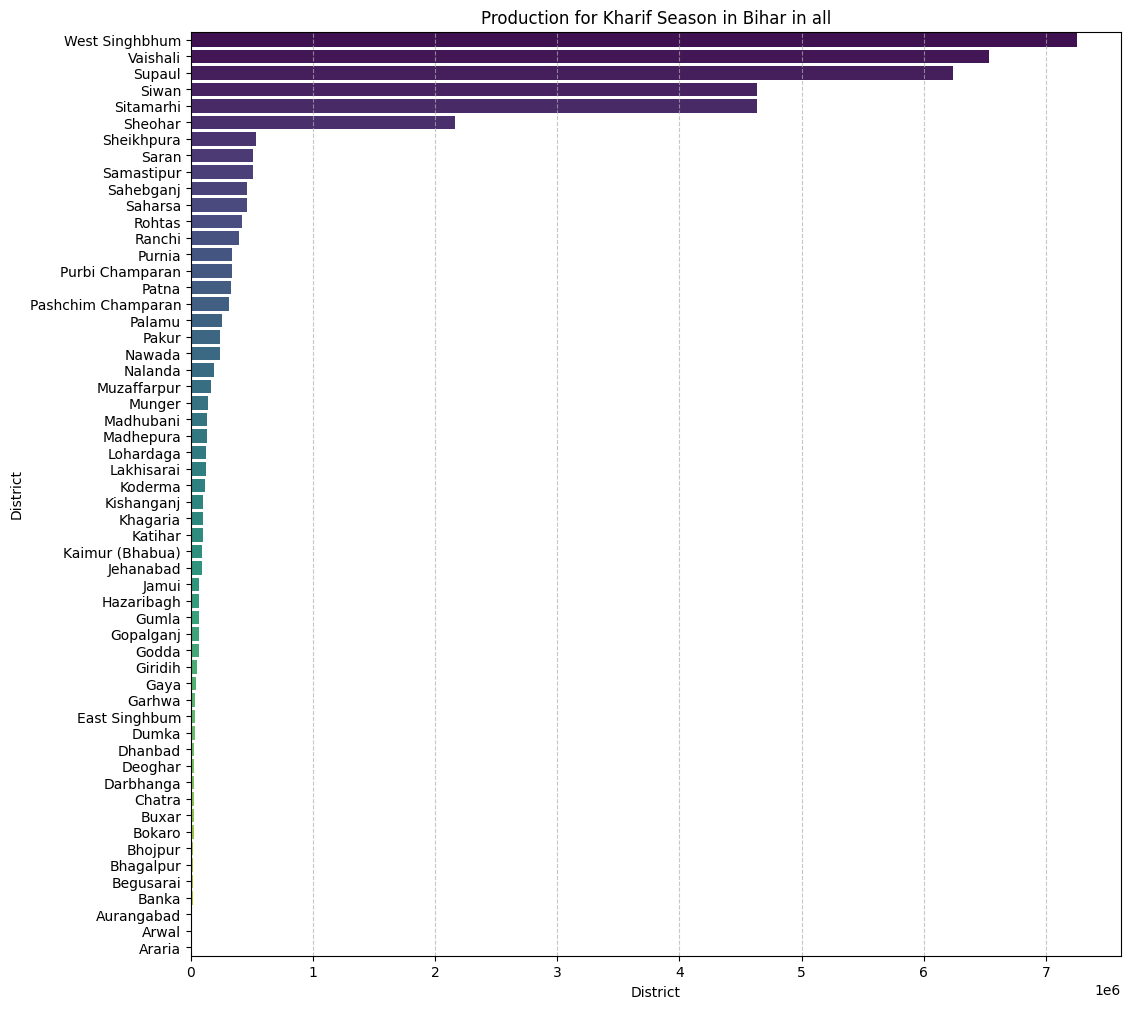

In [ ]:
# which district have highest production in a particular state
def find_Production_district(df, season, state, years):
  if years == 'all':
    filtered_df = df[(df['Season'] == season) & (df['State'] == state)]
  else:
    filtered_df = df[(df['Season'] == season) & (df['State'] == state) & (df['Crop_Year'].isin(years))]

  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('District')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True))

  result.columns = ["District", "Production"]
  return result

#-------------------------------------------------------------------------------------

season = input("Enter the season name: ")
state = input("Enter the state name: ")
year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

production_district = find_Production_district(df, season, state, years)
print(type(production_district))
print(production_district)

plt.figure(figsize=(12, 12))
sns.barplot(x='Production', y='District', data=production_district, hue='District', palette='viridis')

plt.xlabel('Production')
plt.xlabel('District')
plt.title(f'Production for {season} Season in {state} in {year} year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# which district have highest production in India
def find_Production_district_year(season, years):
  filtered_df = df[df['Season'] == season]

  if years == 'all':
    filtered_df = df[df['Season'] == season]
  else:
    filtered_df = df[(df['Season'] == season) & (df['Crop_Year'].isin(years))]

  if filtered_df.empty:
    return filtered_df

  result = (
      filtered_df.groupby(['State', 'District'])['Production']
      .sum()
      .reset_index()
      .sort_values(by="Production", ascending=False)
  )

  result.columns = ["State", "District", "Production"]
  return result

#-----------------------------------------------------------------------------------------------------------------

season = input("Enter the season name: ")
year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

production_district = find_Production_district_year(season, years)
print(type(production_district))
print(production_district)

Enter the season name: Summer
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
            State                 District  Production
450   West Bengal          Purba Bardhaman  14737449.0
444   West Bengal           Medinipur West  12308152.0
443   West Bengal           Medinipur East  11274712.0
445   West Bengal              Murshidabad  10022616.0
446   West Bengal                    Nadia   9476997.0
..            ...                      ...         ...
90   Chhattisgarh                    Sukma         0.0
89   Chhattisgarh                  Mungeli         0.0
88   Chhattisgarh                    Korba         0.0
87   Chhattisgarh  Gaurella-Pendra-Marwahi         0.0
86   Chhattisgarh                 Bilaspur         0.0

[452 rows x 3 columns]


# *3. Find the draught year from the data*

In [ ]:
x = df[(df['Yield'] == 0) & (df['Production'] == 0)].sort_values(by=['Crop_Year', 'State'])
x

State       District               Crop  Crop_Year  Season  \
1169    Andhra Pradesh      Nizamabad          Arhar/Tur       1998    Rabi   
2871    Andhra Pradesh   Spsr Nellore        Castor seed       1998  Kharif   
5474    Andhra Pradesh       Warangal               Gram       1998    Rabi   
6720    Andhra Pradesh      Nizamabad         Horse-gram       1998    Rabi   
9613    Andhra Pradesh       Warangal  Moong(Green Gram)       1998    Rabi   
...                ...            ...                ...        ...     ...   
301603   Uttar Pradesh         Deoria  Moong(Green Gram)       2019  Kharif   
302893   Uttar Pradesh  Muzaffarnagar  Moong(Green Gram)       2019  Kharif   
313866   Uttar Pradesh         Shamli           Sannhamp       2019  Kharif   
315025   Uttar Pradesh         Meerut            Sesamum       2019  Kharif   
315082   Uttar Pradesh  Muzaffarnagar            Sesamum       2019  Kharif   

         Area  Production  Yield  
1169    100.0         0.0    0.0  
2871    100.0         0.0    0.0  
5474    400.0         0.0    0.0  
6720    100.0         0.0    0.0  
9613    100.0         0.0    0.0  
...       ...         ...    ...  
301603    1.0         0.0    0.0  
302893    1.0         0.0    0.0  
313866    1.0         0.0    0.0  
315025    1.0         0.0    0.0  
315082    1.0         0.0    0.0  

[5975 rows x 8 columns]

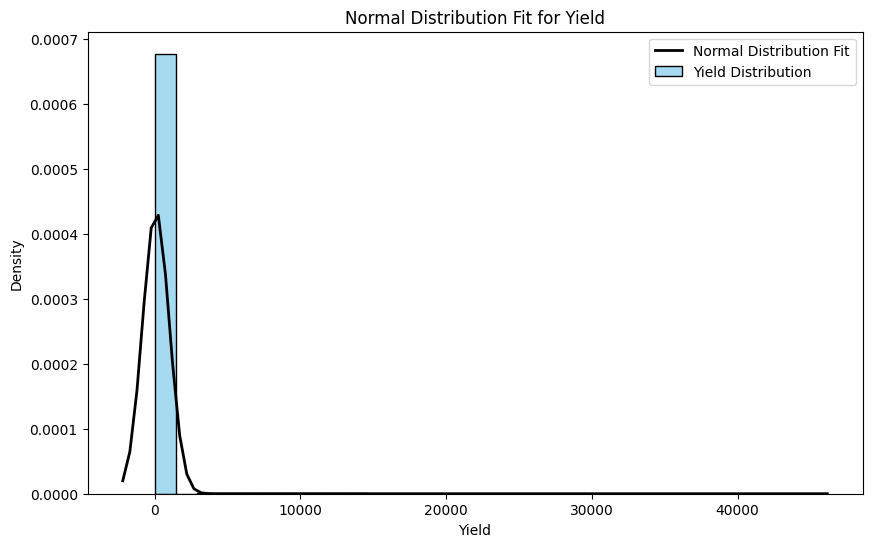

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Extracting the yield column
yield_data = df['Yield']

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(yield_data, kde=False, bins=30, color='skyblue', stat='density', label='Yield Distribution')

# Overlaying the normal distribution curve
mean, std = norm.fit(yield_data)  # Fit the data to a normal distribution
xmin, xmax = plt.xlim()  # Get the range of x-axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')

# Labeling the plot
plt.title('Normal Distribution Fit for Yield')
plt.xlabel('Yield')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [43]:
print(df['Yield'].mean())
print(df['Yield'].std())
df['Z_Yield'] = (df['Yield'] - df['Yield'].mean()) / df['Yield'].std()
drought_years = df[df['Z_Yield'] < -3]['Crop_Year'].unique()
drought_years

79.42520358964113
916.6902521104909


array([], dtype=int64)

In [44]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield', 'Z_Yield'],
      dtype='object')

# *4. Find the state which produces more rice and more sugarcane*

In [ ]:
crop_name = sorted(df['Crop'].unique())
print(crop_name)

['Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Barley', 'Black pepper', 'Cardamom', 'Cashewnut', 'Castor seed', 'Coconut ', 'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)', 'Dry chillies', 'Garlic', 'Ginger', 'Gram', 'Groundnut', 'Guar seed', 'Horse-gram', 'Jowar', 'Jute', 'Khesari', 'Linseed', 'Maize', 'Masoor', 'Mesta', 'Moong(Green Gram)', 'Moth', 'Niger seed', 'Oilseeds total', 'Onion', 'Other  Rabi pulses', 'Other Cereals', 'Other Kharif pulses', 'Other Summer Pulses', 'Peas & beans (Pulses)', 'Potato', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower', 'Sannhamp', 'Sesamum', 'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric', 'Urad', 'Wheat', 'other oilseeds']


Enter the crop name: Black pepper
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
                        State  Production
0                  Tamil Nadu   1157005.0
1                  Puducherry    818262.0
2                   Meghalaya     76919.0
3                      Kerala     17648.0
4                   Karnataka     14090.0
5                         Goa      8346.0
6                       Assam      3211.0
7              Andhra Pradesh      1667.0
8  Andaman And Nicobar Island       169.0


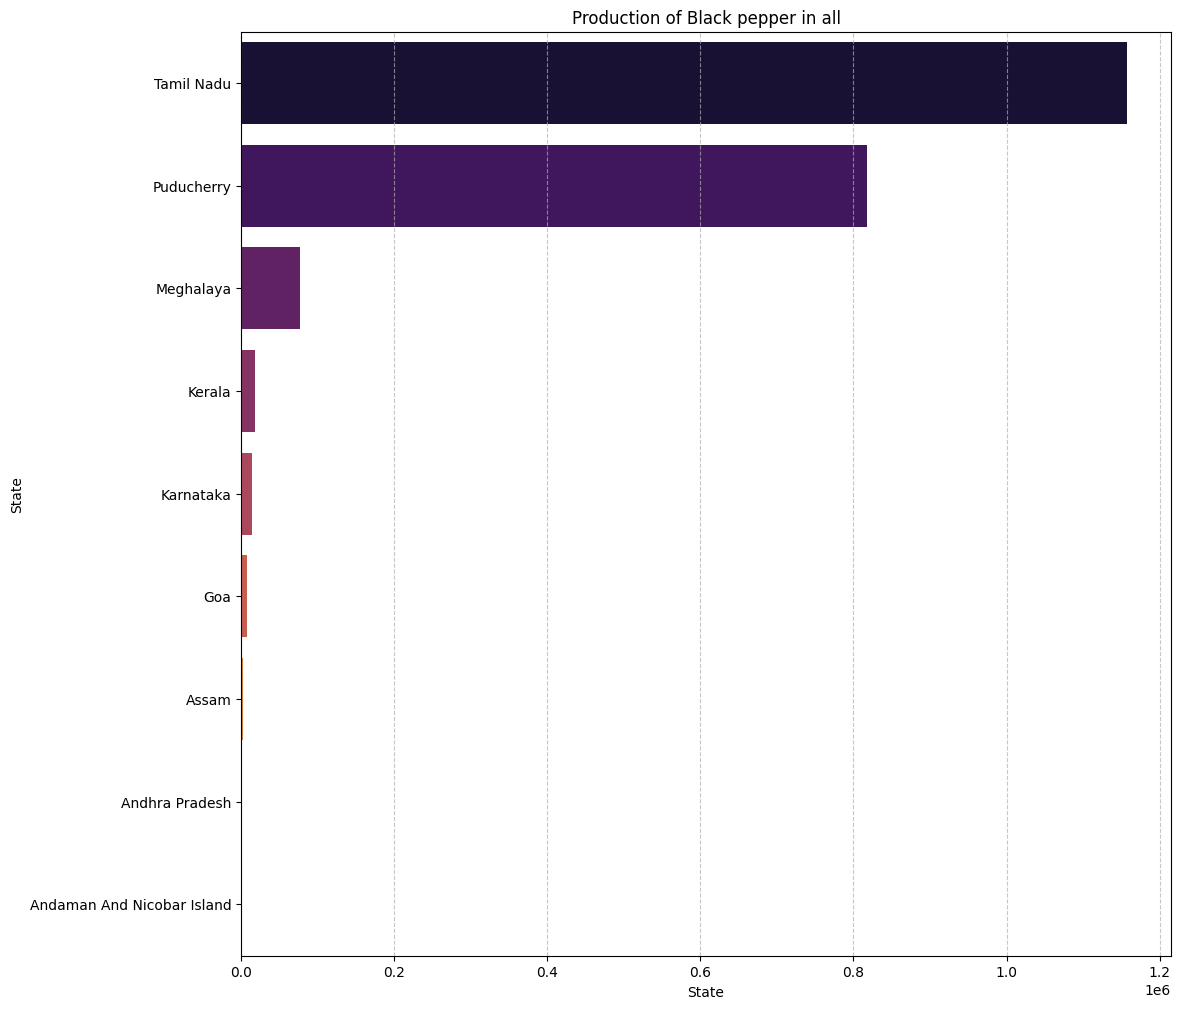

In [ ]:
# which state has highest production of a particular crop
def find_Production_district(df, crop_name, years):
  if years == 'all':
    filtered_df = df[df['Crop'] == crop_name]
  else:
    filtered_df = df[(df['Crop'] == crop_name) & (df['Crop_Year'].isin(years))]

  if filtered_df.empty:
    return filtered_df

  result = (
      filtered_df.groupby('State')['Production']
      .sum()
      .reset_index()
      .apply(lambda x: sorted(x, reverse=True))
  )

  result.columns = ["State", "Production"]
  return result

#-------------------------------------------------------------------------------------

crop_name = input("Enter the crop name: ")
year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

production_crop = find_Production_district(df, crop_name, years)
print(type(production_crop))
print(production_crop)

plt.figure(figsize=(12, 12))
sns.barplot(x='Production', y='State', data=production_crop, hue='State', palette='inferno')

plt.xlabel('Production')
plt.xlabel('State')
plt.title(f'Production of {crop_name} in {year}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df[df['Crop'] == "Peas & beans (Pulses)"]

State District                   Crop  Crop_Year  Season  \
18917   Arunachal Pradesh    Anjaw  Peas & beans (Pulses)       2016  Kharif   
18918   Arunachal Pradesh    Anjaw  Peas & beans (Pulses)       2016    Rabi   
18919   Arunachal Pradesh    Anjaw  Peas & beans (Pulses)       2017  Kharif   
18920   Arunachal Pradesh    Anjaw  Peas & beans (Pulses)       2017    Rabi   
18921   Arunachal Pradesh    Anjaw  Peas & beans (Pulses)       2018  Kharif   
...                   ...      ...                    ...        ...     ...   
339782        West Bengal  Purulia  Peas & beans (Pulses)       2014    Rabi   
339783        West Bengal  Purulia  Peas & beans (Pulses)       2016    Rabi   
339784        West Bengal  Purulia  Peas & beans (Pulses)       2017    Rabi   
339785        West Bengal  Purulia  Peas & beans (Pulses)       2018    Rabi   
339786        West Bengal  Purulia  Peas & beans (Pulses)       2019    Rabi   

         Area  Production  Yield  
18917    29.0        13.0   0.45  
18918    75.0       105.0   1.40  
18919    22.0        15.0   0.68  
18920    66.0       106.0   1.61  
18921    22.0        15.0   0.68  
...       ...         ...    ...  
339782   12.0        12.0   1.00  
339783   57.0        55.0   0.96  
339784  362.0       389.0   1.07  
339785  170.0       194.0   1.14  
339786  470.0       434.0   0.92  

[7266 rows x 8 columns]

# *8. Software for analysis of yields of whole nation*

In [ ]:
def yield_analysis(df, crop_name, year, season_name):
  if year == 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name))]
  elif year != 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name) & (df['Crop_Year'].isin(year))]
  elif year != 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop_Year'].isin(year))]
  elif year == 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name)]
  elif year == 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[df['Season'].isin(season_name)]
  elif year != 'all' and season_name == 'all' and crop_name == 'all':
    filtered_df = df[df['Crop_Year'].isin(year)]
  elif year != 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name)) & (df['Crop_Year'].isin(year))]
  else:
    filtered_df = df

  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('State')['Yield'].sum().reset_index().apply(lambda x: sorted(x, reverse=True))
  result.columns = ["State", "Yield"]
  return result

crop_name = input("Enter the crop name (comma-separated) or type 'all': ")
season_name = input("Enter the season name (comma-separated) or type 'all': ")
year = input("Enter the years (comma-separated) or type 'all': ")

if crop_name.lower() == "all":
    crop_name = "all"
else:
    crop_name = crop_name.split(",")

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

if year.lower() == "all":
    year = "all"
else:
    year = list(map(int, year.split(",")))

totalYield = yield_analysis(df, crop_name, year, season_name)
print(type(totalYield))
print(totalYield)

Enter the crop name (comma-separated) or type 'all': all
Enter the season name (comma-separated) or type 'all': Kharif
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
                         State     Yield
0                  West Bengal  96006.83
1                  Uttarakhand  28953.03
2                Uttar Pradesh  21421.61
3                      Tripura  16174.69
4                    Telangana  14618.48
5                   Tamil Nadu  14029.87
6                       Sikkim  13765.02
7                    Rajasthan  12296.75
8                       Punjab  11555.39
9                   Puducherry  11433.28
10                      Odisha  10652.31
11                    Nagaland   9824.01
12                     Mizoram   8135.44
13                   Meghalaya   5851.11
14                     Manipur   5553.38
15                 Maharashtra   5486.39
16              Madhya Pradesh   5133.31
17                      Ladakh   4719.90
18         

In [ ]:
df[df['Season'] == 'Kharif']['Yield'].sum()

327258.4799999999

In [ ]:
df[df['Season'] == 'Rabi']['Yield'].sum()

224417.59

In [ ]:
df[df['Season'] == 'Autumn']['Yield'].sum()

17090.170000000002

In [ ]:
df[df['Season'] == 'Whole Year']['Yield'].sum()

26735345.63

In [ ]:
df[df['Season'] == 'Summer']['Yield'].sum()

73750.54

In [ ]:
df[df['Season'] == 'Winter']['Yield'].sum()

49804.87

In [ ]:
fig = px.bar(totalYield, x='Yield', y='State', orientation='h',
             color='State',
             title='State wise Yield')

# Update layout
fig.update_layout(
    xaxis_title="Yield",
    yaxis_title="State",
    title_font_size=20,
    #template="plotly_dark",
    width=1200,  # Set figure width
    height=800,  # Set figure height
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    #yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5)   # Grid for y-axis
    title_x = 0.5
)

# Show plot
fig.show()

In [ ]:
def production_analysis(df, crop_name, year, season_name):
  if year == 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name))]
  elif year != 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name) & (df['Crop_Year'].isin(year))]
  elif year != 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop_Year'].isin(year))]
  elif year == 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name)]
  elif year == 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[df['Season'].isin(season_name)]
  elif year != 'all' and season_name == 'all' and crop_name == 'all':
    filtered_df = df[df['Crop_Year'].isin(year)]
  elif year != 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name)) & (df['Crop_Year'].isin(year))]
  else:
    filtered_df = df

  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('State')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True))
  result.columns = ["State", "Production"]
  return result

crop_name = input("Enter the crop name (comma-separated) or type 'all': ")
season_name = input("Enter the season name (comma-separated) or type 'all': ")
year = input("Enter the years (comma-separated) or type 'all': ")

if crop_name.lower() == "all":
    crop_name = "all"
else:
    crop_name = crop_name.split(",")

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

if year.lower() == "all":
    year = "all"
else:
    year = list(map(int, year.split(",")))

totalProduction = production_analysis(df, crop_name, year, season_name)
print(type(totalProduction))
print(totalProduction)

Enter the crop name (comma-separated) or type 'all': all
Enter the season name (comma-separated) or type 'all': all
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
                         State    Production
0                  West Bengal  1.297006e+11
1                  Uttarakhand  7.805176e+10
2                Uttar Pradesh  6.377280e+10
3                      Tripura  2.607622e+10
4                    Telangana  8.941179e+09
5                   Tamil Nadu  4.442585e+09
6                       Sikkim  3.637715e+09
7                    Rajasthan  2.193998e+09
8                       Punjab  2.053350e+09
9                   Puducherry  1.878565e+09
10                      Odisha  8.344903e+08
11                    Nagaland  8.075817e+08
12                     Mizoram  7.815514e+08
13                   Meghalaya  5.897396e+08
14                     Manipur  5.891643e+08
15                 Maharashtra  5.449535e+08
16              Madhya Prade

In [ ]:
fig = px.bar(totalProduction, x='Production', y='State', orientation='h',
             color='State',
             title='State wise Production')

# Update layout
fig.update_layout(
    xaxis_title="Production",
    yaxis_title="State",
    title_font_size=20,
    #template="plotly_dark",
    width=1200,  # Set figure width
    height=800,  # Set figure height
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    #yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5)   # Grid for y-axis
    title_x=0.5  # Center align title
)

# Show plot
fig.show()

In [ ]:
def yield_analysis_year_wise(df, crop_name, state_name, season_name):
  if state_name == 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name))]
  elif state_name != 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name) & (df['State'].isin(state_name))]
  elif state_name != 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['State'].isin(state_name))]
  elif state_name == 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name)]
  elif state_name == 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[df['Season'].isin(season_name)]
  elif state_name != 'all' and season_name == 'all' and crop_name == 'all':
    filtered_df = df[df['State'].isin(state_name)]
  elif state_name != 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name)) & (df['State'].isin(state_name))]
  else:
    filtered_df = df

  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('Crop_Year')['Yield'].sum().reset_index().apply(lambda x: sorted(x, reverse=True))
  result.columns = ["Year", "Yield"]
  return result

crop_name = input("Enter the crop name (comma-separated) or type 'all': ")
season_name = input("Enter the season name (comma-separated) or type 'all': ")
state_name = input("Enter the state name (comma-separated) or type 'all': ")

if crop_name.lower() == "all":
    crop_name = "all"
else:
    crop_name = crop_name.split(",")

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

if state_name.lower() == "all":
    state_name = "all"
else:
    state_name = state_name.split(",")

totalYield_yearWise = yield_analysis_year_wise(df, crop_name, state_name, season_name)
print(type(totalYield_yearWise))
totalYield_yearWise

Enter the crop name (comma-separated) or type 'all': all
Enter the season name (comma-separated) or type 'all': all
Enter the state name (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>


Year       Yield
0   2020  1577452.52
1   2019  1539622.50
2   2018  1535946.60
3   2017  1488453.28
4   2016  1474072.54
5   2015  1473204.68
6   2014  1470233.49
7   2013  1446493.00
8   2012  1431986.69
9   2011  1377139.01
10  2010  1299739.99
11  2009  1218738.25
12  2008  1155868.93
13  2007  1117506.38
14  2006  1105486.35
15  2005  1081929.65
16  2004  1077152.20
17  2003  1050381.68
18  2002   861834.40
19  2001   858076.72
20  2000   692454.76
21  1999   620127.09
22  1998   472445.77
23  1997     1320.80

In [ ]:
fig = px.line(totalYield_yearWise, x='Year', y='Yield', title='Yield Rate Over Time', markers=True)

# Update layout with grid, axis titles, and figure size
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Yield Rate",
    title_font_size=20,
    template="presentation",
    width=1000,  # Set figure width
    height=600,  # Set figure height
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5, zeroline=True),  # Grid for y-axis
    font=dict(family="Arial", size=14),  # Font settings
    margin=dict(l=50, r=50, t=50, b=50)  # Margins
)

fig.show()


In [ ]:
def production_analysis_yearWise(df, crop_name, state_name, season_name):
  if state_name == 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name))]
  elif state_name != 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name) & (df['State'].isin(state_name))]
  elif state_name != 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['State'].isin(state_name))]
  elif state_name == 'all' and season_name == 'all' and crop_name != 'all':
    filtered_df = df[df['Crop'].isin(crop_name)]
  elif state_name == 'all' and season_name != 'all' and crop_name == 'all':
    filtered_df = df[df['Season'].isin(season_name)]
  elif state_name != 'all' and season_name == 'all' and crop_name == 'all':
    filtered_df = df[df['State'].isin(state_name)]
  elif state_name != 'all' and season_name != 'all' and crop_name != 'all':
    filtered_df = df[(df['Season'].isin(season_name)) & (df['Crop'].isin(crop_name)) & (df['State'].isin(state_name))]
  else:
    filtered_df = df

  if filtered_df.empty:
    return filtered_df

  result = filtered_df.groupby('Crop_Year')['Production'].sum().reset_index().apply(lambda x: sorted(x, reverse=True))
  result.columns = ["Year", "Production"]
  return result

crop_name = input("Enter the crop name (comma-separated) or type 'all': ")
season_name = input("Enter the season name (comma-separated) or type 'all': ")
state_name = input("Enter the state name (comma-separated) or type 'all': ")

if crop_name.lower() == "all":
    crop_name = "all"
else:
    crop_name = crop_name.split(",")

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

if state_name.lower() == "all":
    state_name = "all"
else:
    state_name = state_name.split(",")

totalProduction_yearWise = production_analysis_yearWise(df, crop_name, state_name, season_name)
print(type(totalProduction_yearWise))
print(totalProduction_yearWise)

Enter the crop name (comma-separated) or type 'all': all
Enter the season name (comma-separated) or type 'all': Rabi
Enter the state name (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
    Year   Production
0   2020  216631700.0
1   2019  194452442.0
2   2018  193604821.0
3   2017  189185532.0
4   2016  167168127.0
5   2015  162905223.0
6   2014  160635640.0
7   2013  160448408.0
8   2012  153863306.0
9   2011  149508260.0
10  2010  129147960.0
11  2009  127118390.0
12  2008  121305801.0
13  2007  121202142.0
14  2006  118895422.0
15  2005  106860110.0
16  2004  104740349.0
17  2003  101029912.0
18  2002   98568434.0
19  2001   97545155.0
20  2000   97108233.0
21  1999   91512271.0
22  1998   85968858.0
23  1997    1048137.0


In [ ]:
fig = px.line(totalProduction_yearWise, x='Year', y='Production', title='Production Rate Over Time', markers=True)

# Update layout with grid, axis titles, and figure size
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Production",
    title_font_size=20,
    template="presentation",
    width=1000,  # Set figure width
    height=600,  # Set figure height
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5, zeroline=True),  # Grid for y-axis
    font=dict(family="Arial", size=14),  # Font settings
    margin=dict(l=50, r=50, t=50, b=50)  # Margins
)

fig.show()


In [ ]:
def yield_analysis_season_wise():
  result = df.groupby('Season')['Yield'].sum().reset_index()
  result.columns = ["Season", "Yield"]
  return result

season_yield = yield_analysis_season_wise()
print(type(season_yield))
print(season_yield)


<class 'pandas.core.frame.DataFrame'>
       Season        Yield
0      Autumn     17090.17
1      Kharif    327258.48
2        Rabi    224417.59
3      Summer     73750.54
4  Whole Year  26735345.63
5      Winter     49804.87


In [ ]:
fig = px.pie(season_yield, values='Yield', names='Season', title='Yield Season Wise')

fig.update_traces(rotation=-90, pull=[0.1, 0, 0.1, 0, 0.2])  # Set starting angle (in degrees)

fig.update_layout(
    title_font_size=20,
    template="presentation",
    width=800,
    height=800,
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5, zeroline=True),  # Grid for y-axis
    font=dict(family="Arial", size=14),  # Font settings
)

fig.show()


In [ ]:
def production_analysis_season_wise():
  result = df.groupby('Season')['Production'].sum().reset_index()
  result.columns = ["Season", "Production"]
  return result

seasonProduction = production_analysis_season_wise()
print(type(seasonProduction))
print(seasonProduction)


<class 'pandas.core.frame.DataFrame'>
       Season    Production
0      Autumn  8.464151e+07
1      Kharif  5.622335e+09
2        Rabi  3.150455e+09
3      Summer  2.437629e+08
4  Whole Year  3.165636e+11
5      Winter  5.877505e+08


In [ ]:
fig = px.pie(seasonProduction, values='Production', names='Season', title='Production Season Wise')

fig.update_traces(rotation=-90, pull=[0.1, 0, 0.1, 0, 0.2])  # Set starting angle (in degrees)

fig.update_layout(
    title_font_size=20,
    template="presentation",
    width=800,
    height=800,
    xaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),  # Grid for x-axis
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5, zeroline=True),  # Grid for y-axis
    font=dict(family="Arial", size=14),  # Font settings
)

fig.show()


#*9. Categorical data analysis*

#*Frequency Count*

In [ ]:
category_counts = df['State'].value_counts().reset_index()
category_counts.columns = ['State', 'count']

fig = px.bar(category_counts, x='State', y='count', text='count', color='State')

fig.update_layout(
    title="State Count",
    xaxis_title="State",
    yaxis_title="Count",
    template="plotly_white",
    width=1200,
    height=800,
    showlegend=True,
    title_x=0.5
)

fig.show()

In [ ]:
category_counts = df['Crop'].value_counts().reset_index()
category_counts.columns = ['Crop', 'count']

fig = px.bar(category_counts, x='Crop', y='count', text='count', color='Crop')

fig.update_layout(
    title="Crop Count",
    xaxis_title="Crop",
    yaxis_title="Count",
    template="plotly_white",
    width=1200,
    height=800,
    showlegend=True,
    title_x=0.5
)

fig.show()

In [ ]:
category_counts = df['District'].value_counts().reset_index()
category_counts.columns = ['District', 'count']

fig = px.bar(category_counts, x='District', y='count', text='count', color='District')

fig.update_layout(
    title="District Count",
    xaxis_title="District",
    yaxis_title="Count",
    template="plotly_white",
    width=1200,
    height=800,
    title_x=0.5
)

fig.show()

In [ ]:
category_counts = df['Season'].value_counts().reset_index()
category_counts.columns = ['Season', 'count']

fig = px.bar(category_counts, x='Season', y='count', text='count', color='Season')

fig.update_layout(
    title="Season Count",
    xaxis_title="Season",
    yaxis_title="Count",
    template="plotly_white",
    width=1200,
    height=800,
    showlegend=True,
    title_x=0.5
)

fig.show()

In [ ]:
uniqueCrops = df.groupby("State")["Crop"].nunique().reset_index()
uniqueCrops.columns = ["State", "count"]

fig = px.bar(uniqueCrops, x='State', y='count', text='count', color='State')

fig.update_layout(
    title="Unique Crop",
    xaxis_title="State",
    yaxis_title="Count",
    template="plotly_white",
    width=1200,
    height=800,
    showlegend=True,
    title_x=0.5
)

fig.show()

#*10. Pair Plot*

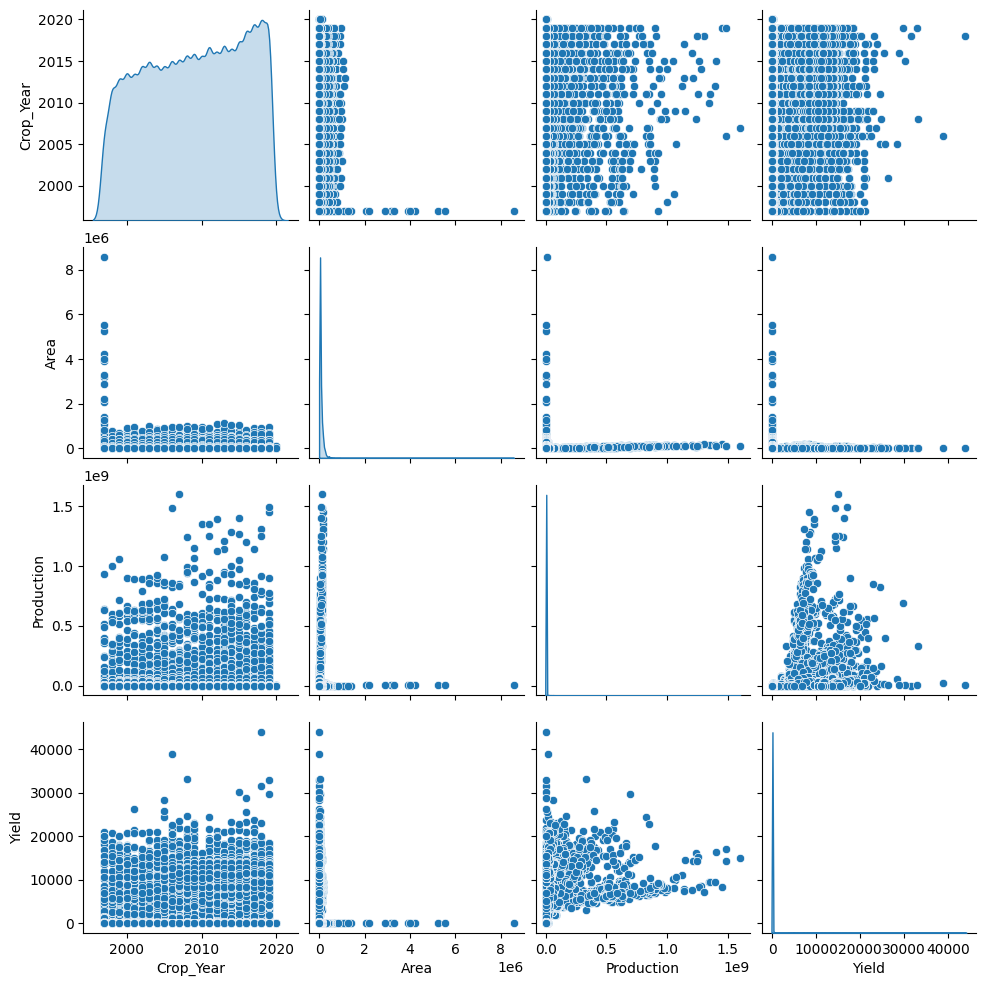

In [ ]:
# Select only numerical columns
num_df = df.select_dtypes(include=['number'])

# Pairplot with KDE for diagonal
sns.pairplot(num_df, diag_kind="kde",)

plt.show()


#*11. Correlation*

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

Crop_Year      Area  Production     Yield
Crop_Year    1.000000 -0.024247    0.004008  0.008561
Area        -0.024247  1.000000    0.048621  0.000422
Production   0.004008  0.048621    1.000000  0.437426
Yield        0.008561  0.000422    0.437426  1.000000

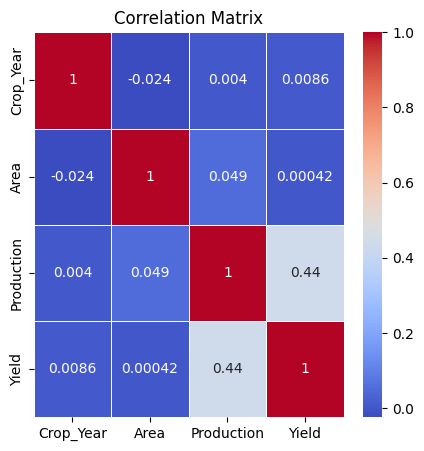

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#*12. Boxplot*

In [ ]:
fig = px.box(df, x="Season", y="Yield", color="Season",
             title="Yield Distribution by Season",
             boxmode="group")  # Grouping box plots

fig.update_layout(
    #title="Unique Crop",
    #xaxis_title="State",
    #yaxis_title="Count",
    #template="plotly_white",
    #width=1200,
    #height=800,
    #showlegend=True,
    title_x=0.5
)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.describe()

Crop_Year          Area    Production          Yield
count  345327.000000  3.453270e+05  3.453270e+05  345327.000000
mean     2008.887680  1.167177e+04  9.447642e+05      79.425204
std         6.564326  4.584135e+04  2.137645e+07     916.690252
min      1997.000000  4.000000e-03  0.000000e+00       0.000000
25%      2003.000000  7.400000e+01  7.700000e+01       0.550000
50%      2009.000000  5.320000e+02  6.810000e+02       1.000000
75%      2015.000000  4.112000e+03  6.941000e+03       2.470000
max      2020.000000  8.580100e+06  1.597800e+09   43958.330000

In [ ]:
Ndf = df
fig = px.box(Ndf, y="Crop_Year", title="Box Plot of Crop_Year")
fig.show()

In [ ]:
Q1 = Ndf["Crop_Year"].quantile(0.25)
Q3 = Ndf["Crop_Year"].quantile(0.75)
IQR = Q3 - Q1

outliers_crop_year = Ndf[(Ndf["Crop_Year"] < (Q1 - 1.5 * IQR)) | (Ndf["Crop_Year"] > (Q3 + 1.5 * IQR))]
print("Outliers in Crop_Year:")
print(outliers_crop_year[["Crop_Year"]])


Outliers in Crop_Year:
Empty DataFrame
Columns: [Crop_Year]
Index: []


In [ ]:
fig = px.box(Ndf, y="Area", title="Box Plot of Area")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Q1 = Ndf["Area"].quantile(0.25)
Q3 = Ndf["Area"].quantile(0.75)
IQR = Q3 - Q1

outliers_area = Ndf[(Ndf["Area"] < (Q1 - 1.5 * IQR)) | (Ndf["Area"] > (Q3 + 1.5 * IQR))]
print("Outliers in Area:")
outliers_area


Outliers in Area:


State  District      Crop  Crop_Year      Season  \
207     Andaman And Nicobar Island  Nicobars  Coconut        2007  Whole Year   
208     Andaman And Nicobar Island  Nicobars  Coconut        2008  Whole Year   
209     Andaman And Nicobar Island  Nicobars  Coconut        2009  Whole Year   
210     Andaman And Nicobar Island  Nicobars  Coconut        2000  Whole Year   
211     Andaman And Nicobar Island  Nicobars  Coconut        2001  Whole Year   
...                            ...       ...       ...        ...         ...   
345280                 West Bengal     Nadia     Wheat       2012        Rabi   
345281                 West Bengal     Nadia     Wheat       2013        Rabi   
345282                 West Bengal     Nadia     Wheat       2014        Rabi   
345283                 West Bengal     Nadia     Wheat       2015        Rabi   
345284                 West Bengal     Nadia     Wheat       2016        Rabi   

           Area  Production    Yield  
207     21636.0  80640000.0  3727.12  
208     43380.0  81900000.0  1887.97  
209     43520.0  84970000.0  1952.44  
210     18168.0  65100000.0  3583.22  
211     18190.0  64430000.0  3542.06  
...         ...         ...      ...  
345280  41720.0    138497.0     3.32  
345281  44269.0    149020.0     3.37  
345282  43551.0    148327.0     3.41  
345283  37230.0     92257.0     2.48  
345284  35258.0    113106.0     3.21  

[57535 rows x 8 columns]

In [ ]:
outliers_area.describe()

Crop_Year          Area    Production         Yield
count  57535.000000  5.753500e+04  5.753500e+04  57535.000000
mean    2008.259286  6.383568e+04  4.997125e+06    121.864863
std        6.607810  9.657443e+04  5.181908e+07   1092.545614
min     1997.000000  1.017000e+04  0.000000e+00      0.000000
25%     2003.000000  1.755200e+04  1.885650e+04      0.740000
50%     2008.000000  3.520000e+04  5.506500e+04      1.450000
75%     2014.000000  7.921650e+04  1.821245e+05      2.640000
max     2020.000000  8.580100e+06  1.597800e+09  29772.000000

In [ ]:
fig = px.box(df, y="Production", title="Box Plot of Production")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Ndf.describe()

Crop_Year          Area    Production          Yield
count  345327.000000  3.453270e+05  3.453270e+05  345327.000000
mean     2008.887680  1.167177e+04  9.447642e+05      79.425204
std         6.564326  4.584135e+04  2.137645e+07     916.690252
min      1997.000000  4.000000e-03  0.000000e+00       0.000000
25%      2003.000000  7.400000e+01  7.700000e+01       0.550000
50%      2009.000000  5.320000e+02  6.810000e+02       1.000000
75%      2015.000000  4.112000e+03  6.941000e+03       2.470000
max      2020.000000  8.580100e+06  1.597800e+09   43958.330000

In [ ]:
Q1 = df["Production"].quantile(0.25)
Q3 = df["Production"].quantile(0.75)
IQR = Q3 - Q1

outliers_production = df[(df["Production"] < (Q1 - 1.5 * IQR)) | (df["Production"] > (Q3 + 1.5 * IQR))]
print("Outliers in Production:")
outliers_production


Outliers in Production:


State        District      Crop  Crop_Year  \
102     Andaman And Nicobar Island  South Andamans    Banana       2004   
207     Andaman And Nicobar Island        Nicobars  Coconut        2007   
208     Andaman And Nicobar Island        Nicobars  Coconut        2008   
209     Andaman And Nicobar Island        Nicobars  Coconut        2009   
210     Andaman And Nicobar Island        Nicobars  Coconut        2000   
...                            ...             ...       ...        ...   
345280                 West Bengal           Nadia     Wheat       2012   
345281                 West Bengal           Nadia     Wheat       2013   
345282                 West Bengal           Nadia     Wheat       2014   
345283                 West Bengal           Nadia     Wheat       2015   
345284                 West Bengal           Nadia     Wheat       2016   

            Season     Area  Production    Yield  
102     Whole Year   1912.1     17374.0     9.09  
207     Whole Year  21636.0  80640000.0  3727.12  
208     Whole Year  43380.0  81900000.0  1887.97  
209     Whole Year  43520.0  84970000.0  1952.44  
210     Whole Year  18168.0  65100000.0  3583.22  
...            ...      ...         ...      ...  
345280        Rabi  41720.0    138497.0     3.32  
345281        Rabi  44269.0    149020.0     3.37  
345282        Rabi  43551.0    148327.0     3.41  
345283        Rabi  37230.0     92257.0     2.48  
345284        Rabi  35258.0    113106.0     3.21  

[60858 rows x 8 columns]

In [ ]:
outliers_production.describe()

Crop_Year          Area    Production         Yield
count  60858.000000  6.085800e+04  6.085800e+04  60858.000000
mean    2008.781705  5.675127e+04  5.352188e+06    434.876009
std        6.623369  9.602255e+04  5.068870e+07   2144.273611
min     1997.000000  2.000000e+00  1.723800e+04      0.020000
25%     2003.000000  8.783250e+03  3.416500e+04      1.420000
50%     2009.000000  2.910000e+04  8.100000e+04      2.620000
75%     2015.000000  7.431625e+04  2.376985e+05     12.207500
max     2020.000000  8.580100e+06  1.597800e+09  43958.330000

In [ ]:
fig = px.box(df, y="Yield", title="Box Plot of Production")
fig.show()

In [ ]:
Q1 = df["Yield"].quantile(0.25)
Q3 = df["Yield"].quantile(0.75)
IQR = Q3 - Q1

outliers_yield = df[(df["Yield"] < (Q1 - 1.5 * IQR)) | (df["Yield"] > (Q3 + 1.5 * IQR))]
print("Outliers in Yield:")
outliers_yield


Outliers in Yield:


State        District       Crop  Crop_Year  \
48      Andaman And Nicobar Island  South Andamans   Arecanut       2017   
66      Andaman And Nicobar Island        Nicobars     Banana       2007   
67      Andaman And Nicobar Island        Nicobars     Banana       2007   
68      Andaman And Nicobar Island        Nicobars     Banana       2008   
69      Andaman And Nicobar Island        Nicobars     Banana       2008   
...                            ...             ...        ...        ...   
343655                 West Bengal         Purulia  Sugarcane       2018   
343656                 West Bengal         Purulia  Sugarcane       2019   
344427                 West Bengal      Darjeeling       Urad       1997   
344549                 West Bengal         Hooghly       Urad       1997   
344583                 West Bengal          Howrah       Urad       1997   

            Season     Area  Production   Yield  
48            Rabi  1220.20     10519.0    8.62  
66          Kharif   837.95      7451.0    8.89  
67            Rabi   685.59      6096.0    8.89  
68          Autumn   795.00      7710.0    9.70  
69          Summer   794.00      7710.0    9.71  
...            ...      ...         ...     ...  
343655  Whole Year   455.00     50835.0  111.73  
343656  Whole Year  1045.00    124883.0  119.51  
344427      Kharif   103.00       800.0    7.77  
344549      Kharif     1.00        10.0   10.00  
344583      Kharif     5.00        30.0    6.00  

[51583 rows x 8 columns]

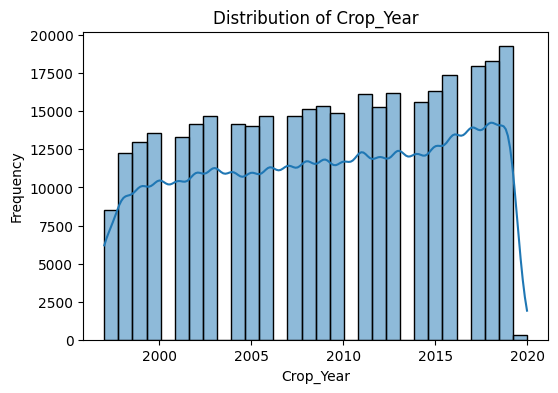

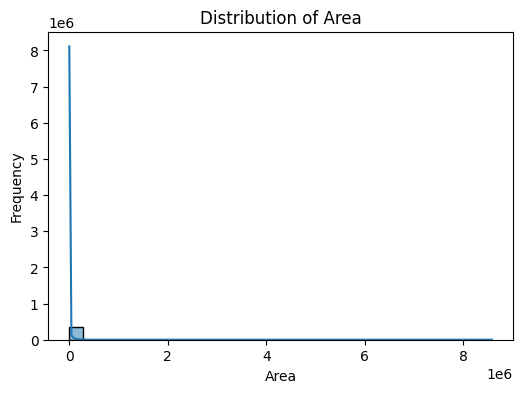

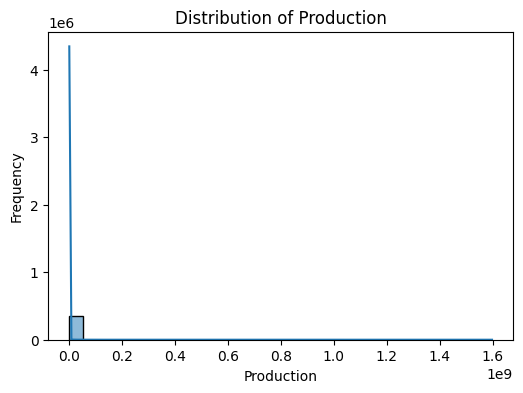

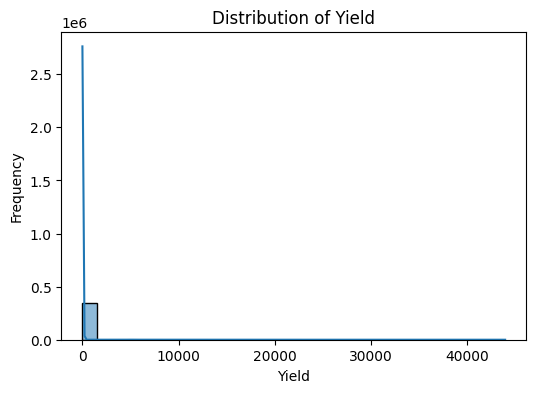

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot distribution for each numeric column
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
